In [1]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint



nifty_50_tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'HINDUNILVR.NS', 'HDFC.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'ITC.NS', 'ASIANPAINT.NS', 'DMART.NS', 'BAJFINANCE.NS', 'MARUTI.NS', 'HCLTECH.NS', 'LT.NS', 'WIPRO.NS', 'AXISBANK.NS', 'ULTRACEMCO.NS', 'SUNPHARMA.NS', 'BAJAJFINSV.NS', 'NESTLEIND.NS', 'TITAN.NS']

def download_data(tickers, start_date='2013-01-01', end_date='2023-12-31'):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

nifty_50_data = download_data(nifty_50_tickers)

num_rows = nifty_50_data.shape[0]

split_index = num_rows // 2

train_data = nifty_50_data.iloc[:split_index]
test_data = nifty_50_data.iloc[split_index:]

correlation_matrix = train_data.corr()

print(correlation_matrix)


[*********************100%%**********************]  24 of 24 completed

1 Failed download:
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-01 -> 2023-12-31)')


Ticker         ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Ticker                                                                    
ASIANPAINT.NS       1.000000     0.847758       0.911622       0.924371   
AXISBANK.NS         0.847758     1.000000       0.661146       0.672643   
BAJAJFINSV.NS       0.911622     0.661146       1.000000       0.990736   
BAJFINANCE.NS       0.924371     0.672643       0.990736       1.000000   
BHARTIARTL.NS       0.563974     0.616804       0.609991       0.616403   
DMART.NS            0.659154     0.431732       0.832111       0.869886   
HCLTECH.NS          0.784015     0.847196       0.657830       0.664600   
HDFC.NS                  NaN          NaN            NaN            NaN   
HDFCBANK.NS         0.936031     0.747294       0.981147       0.985124   
HINDUNILVR.NS       0.899907     0.747188       0.925622       0.946978   
ICICIBANK.NS        0.678325     0.816393       0.654777       0.639748   
INFY.NS             0.779

In [2]:
# Initialize a DataFrame to hold the p-values
p_values = pd.DataFrame(index=nifty_50_tickers, columns=nifty_50_tickers)

# Perform the cointegration test on each pair of stocks
for i in nifty_50_tickers:
    for j in nifty_50_tickers:
        if i != j:  # Avoid testing a stock with itself
            # Drop any rows with missing or infinite values
            pair_data = train_data[[i, j]].dropna()
            if not pair_data.empty:  # Avoid testing on empty data
                _, p_value, _ = coint(pair_data[i], pair_data[j])
                p_values.loc[i, j] = p_value

print(p_values)

              RELIANCE.NS HDFCBANK.NS   INFY.NS    TCS.NS HINDUNILVR.NS  \
RELIANCE.NS           NaN    0.560914  0.925897  0.548315      0.230618   
HDFCBANK.NS      0.508296         NaN  0.847585  0.485023       0.23665   
INFY.NS          0.458548    0.339724       NaN  0.180931       0.24783   
TCS.NS           0.327238    0.283508  0.234337       NaN      0.059389   
HINDUNILVR.NS    0.325123    0.312151   0.83912  0.184223           NaN   
HDFC.NS               NaN         NaN       NaN       NaN           NaN   
ICICIBANK.NS     0.500482    0.429225  0.341424  0.177135      0.563741   
KOTAKBANK.NS     0.568084    0.308398  0.720608  0.269204      0.106874   
SBIN.NS          0.565073    0.453896  0.448045  0.334182      0.523948   
BHARTIARTL.NS    0.094801    0.095478  0.195483  0.109715      0.092074   
ITC.NS           0.046408    0.026716  0.351786  0.330138      0.137258   
ASIANPAINT.NS    0.609811    0.363235  0.517427   0.53302      0.860225   
DMART.NS         0.388092

In [3]:
# Find the index of the minimum p-value
min_p_value_index = p_values.min().idxmin()

# Find the corresponding stock
min_p_value_stock = p_values[min_p_value_index].idxmin()

print(f"The pair of stocks with the lowest p-value is: {min_p_value_index}, {min_p_value_stock}")

The pair of stocks with the lowest p-value is: ICICIBANK.NS, SBIN.NS


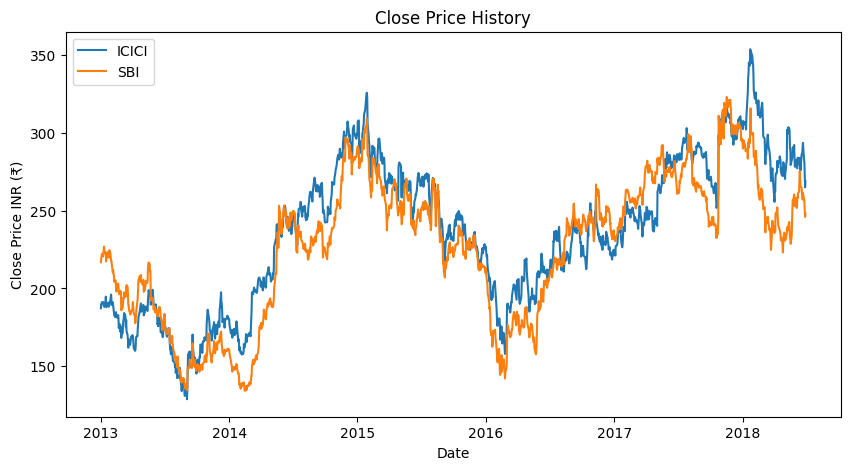

In [4]:
tickers = ['ICICIBANK.NS', 'SBIN.NS']
train_data_new = nifty_50_data[tickers].iloc[:split_index]

import matplotlib.pyplot as plt

# Plot the close prices
plt.figure(figsize=(10,5))
plt.plot(train_data_new['ICICIBANK.NS'], label='ICICI')
plt.plot(train_data_new['SBIN.NS'], label='SBI')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.legend(loc='upper left')
plt.show()

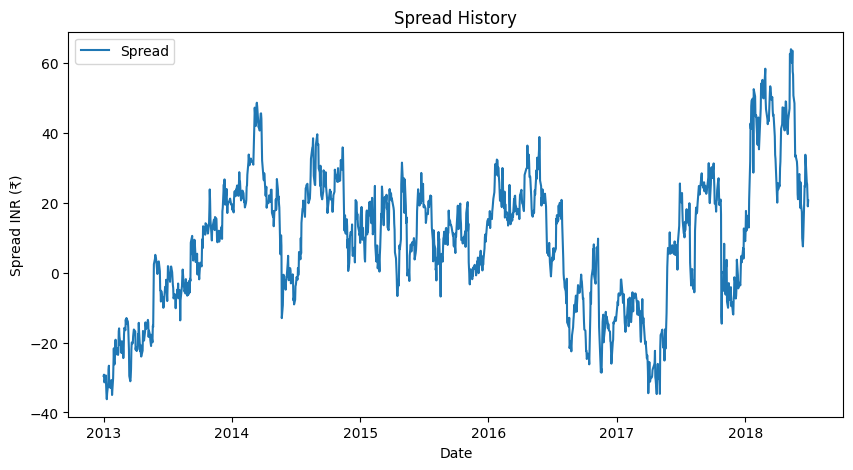

In [5]:
# Calculate the spread
spread = train_data_new['ICICIBANK.NS'] - train_data_new['SBIN.NS']

# Plot the spread
plt.figure(figsize=(10,5))
plt.plot(spread, label='Spread')
plt.title('Spread History')
plt.xlabel('Date')
plt.ylabel('Spread INR (₹)')
plt.legend(loc='upper left')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(spread)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.129110150529978
p-value: 0.0008666094561918224
Critical Values:
	1%: -3.4351852261663867
	5%: -2.863675384893896
	10%: -2.5679068804891


In [7]:
import statsmodels.api as sm

# Define the dependent variable and the independent variable
Y = train_data_new['ICICIBANK.NS']
X = train_data_new['SBIN.NS']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           ICICIBANK.NS   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     6916.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:59:24   Log-Likelihood:                -5914.9
No. Observations:                1356   AIC:                         1.183e+04
Df Residuals:                    1354   BIC:                         1.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9138      2.653      7.505      0.0

In [11]:
price_ratio = test_data['ICICIBANK.NS'] / test_data['SBIN.NS']
z_scores = (price_ratio - price_ratio.mean()) / price_ratio.std()
signals = pd.DataFrame(index=z_scores.index)
signals['ICICIBANK.NS'] = 0
signals['SBIN.NS'] = 0

# Calculate the mean and standard deviation of the z-scores
mean_z_score = z_scores.mean()
std_z_score = z_scores.std()

# Define the upper and lower thresholds
upper_threshold = mean_z_score + std_z_score
lower_threshold = mean_z_score - std_z_score

# Create trading signals based on the z-scores and the thresholds
signals['ICICIBANK.NS'][z_scores > upper_threshold] = -1
signals['ICICIBANK.NS'][z_scores < lower_threshold] = 1
signals['SBIN.NS'][z_scores > upper_threshold] = 1
signals['SBIN.NS'][z_scores < lower_threshold] = -1

print(signals)

            ICICIBANK.NS  SBIN.NS
Date                             
2018-07-02             1       -1
2018-07-03             1       -1
2018-07-04             1       -1
2018-07-05             1       -1
2018-07-06             1       -1
...                  ...      ...
2023-12-22             0        0
2023-12-26             0        0
2023-12-27             0        0
2023-12-28             0        0
2023-12-29             0        0

[1357 rows x 2 columns]


C:\Users\apoor\AppData\Local\Temp\ipykernel_12404\1188586988.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['ICICIBANK.NS'][z_scores > upper_threshold] = -1
C:\Users\apoor\AppData\Local\Temp\ipykernel_12404\1188586988.py:17: Fu

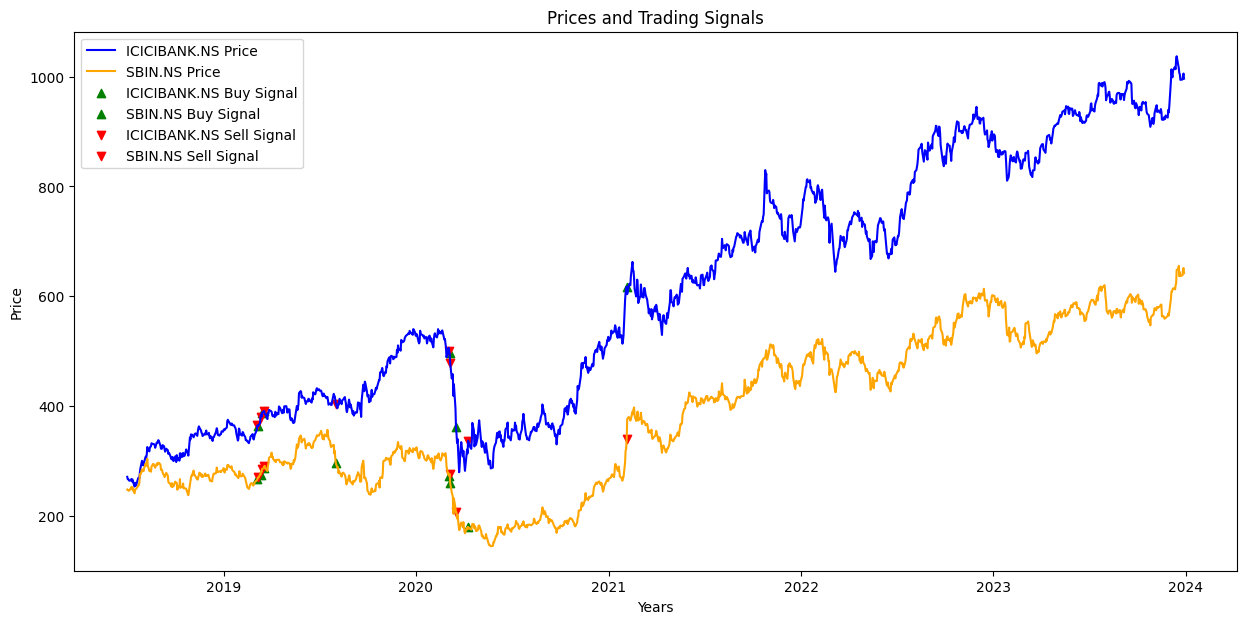

In [13]:
# Create positions as the first difference of the signals
signals['positions1'] = signals['ICICIBANK.NS'].diff()
signals['positions2'] = signals['SBIN.NS'].diff()

# Plot the prices
plt.figure(figsize=(15,7))
plt.plot(signals.index, test_data['ICICIBANK.NS'], label='ICICIBANK.NS Price', color='b')
plt.plot(signals.index, test_data['SBIN.NS'], label='SBIN.NS Price', color='orange')

# Plot the trading signals only when the position changes
# Green up triangles for longing
plt.scatter(signals[signals['positions1'] > 0].index, test_data['ICICIBANK.NS'][signals['positions1'] > 0], marker='^', color='g', label='ICICIBANK.NS Buy Signal')
plt.scatter(signals[signals['positions2'] > 0].index, test_data['SBIN.NS'][signals['positions2'] > 0], marker='^', color='g', label='SBIN.NS Buy Signal')

# Red down triangles for shorting
plt.scatter(signals[signals['positions1'] < 0].index, test_data['ICICIBANK.NS'][signals['positions1'] < 0], marker='v', color='r', label='ICICIBANK.NS Sell Signal')
plt.scatter(signals[signals['positions2'] < 0].index, test_data['SBIN.NS'][signals['positions2'] < 0], marker='v', color='r', label='SBIN.NS Sell Signal')

plt.title('Prices and Trading Signals')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [20]:
# Initialize the portfolio
initial_capital = 100000
max1 = initial_capital // max(test_data['ICICIBANK.NS'])
max2 = initial_capital // max(test_data['SBIN.NS'])

portfolio = pd.DataFrame(index=signals.index)
portfolio['ICICIBANK.NS'] = signals['positions1'].cumsum() * test_data['ICICIBANK.NS'] * max1
portfolio['cash1'] = initial_capital - (signals['positions1'] * test_data['ICICIBANK.NS'] * max1).cumsum()
portfolio['total asset1'] = portfolio['ICICIBANK.NS'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()

portfolio['SBIN.NS'] = signals['positions2'].cumsum() * test_data['SBIN.NS'] * max2
portfolio['cash2'] = initial_capital - (signals['positions2'] * test_data['SBIN.NS'] * max2).cumsum()
portfolio['total asset2'] = portfolio['SBIN.NS'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()

portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']

# Calculate the final returns
final_returns = (portfolio['total asset'].iloc[-1] - initial_capital) / initial_capital
print('Final Returns: {:.2f}%'.format(final_returns * 100))

# Print the final portfolio value
final_portfolio_value = portfolio['total asset'].iloc[-1]
print('Final Portfolio Value: {:.2f}'.format(final_portfolio_value))

# Calculate CAGR
delta = (portfolio.index[-1] - portfolio.index[0]).days
YEAR_DAYS = 365
returns = (portfolio['total asset'].iloc[-1]/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

Final Returns: 99.41%
Final Portfolio Value: 199412.94
CAGR = 13.381%


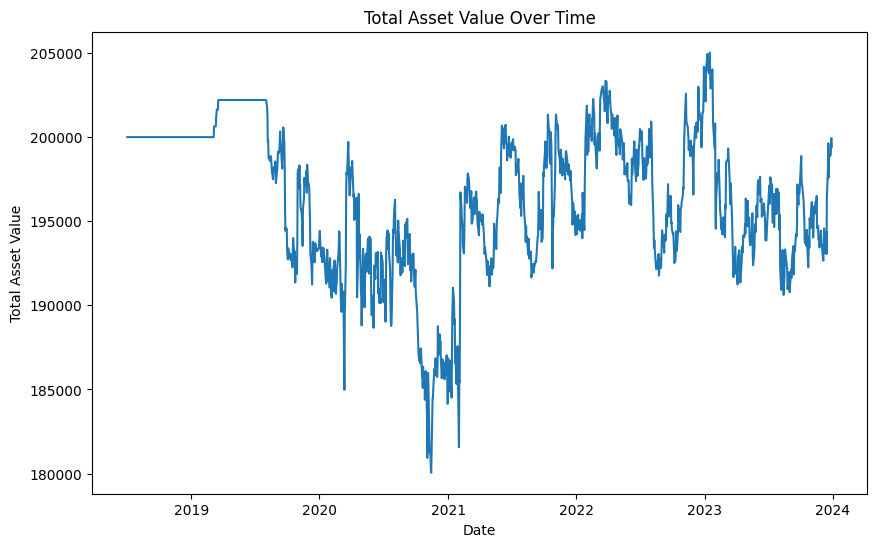

In [21]:
import matplotlib.pyplot as plt

# Plot the total asset value
plt.figure(figsize=(10,6))
plt.plot(portfolio.index, portfolio['total asset'])
plt.title('Total Asset Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Asset Value')
plt.show()